<a href="https://colab.research.google.com/github/bnegash/CS4662/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2DTranspose

# import some utilities to transform our data
from keras.utils import np_utils

from tensorflow.keras import layers

In [2]:
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# add random noise to all training and testing samples and save them as new datasets
def noise(arr):
    noise_factor = 0.4
    noise_arr = arr + noise_factor * np.random.normal(
        loc=0.0, scale=1.0,size=arr.shape)
    return np.clip(noise_arr,0.0,1.0)

# Create noisy versions of the training and testing data
noisy_X_train = noise(X_train)
noisy_X_test = noise(X_test)

# print the size of the training set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


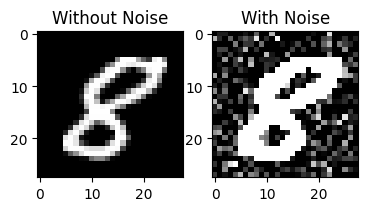

In [4]:
%matplotlib inline

# Select a random sample index
idx = np.random.randint(0, len(X_test))

# Plot the original sample
plt.subplot(1,3,1)
plt.imshow(X_test[idx], cmap='gray')
plt.title("Without Noise")

# Add noise to the sample and plot
noisy_sample = noise(X_test[idx])
plt.subplot(1,3,2)
plt.imshow(noisy_sample, cmap='gray')
plt.title("With Noise")

plt.show()

In [5]:
# Model architecture
model = Sequential()
# Encoder
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Convolution2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
# Decoder
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Convolution2D(1, (3, 3), activation="sigmoid", padding="same"))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                        

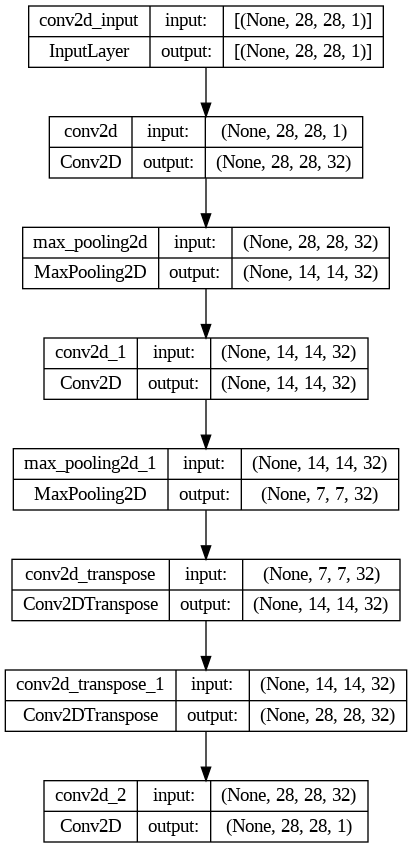

In [6]:
keras.utils.plot_model(model, show_shapes=True)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9104
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9107
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9247
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: -504.9322
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


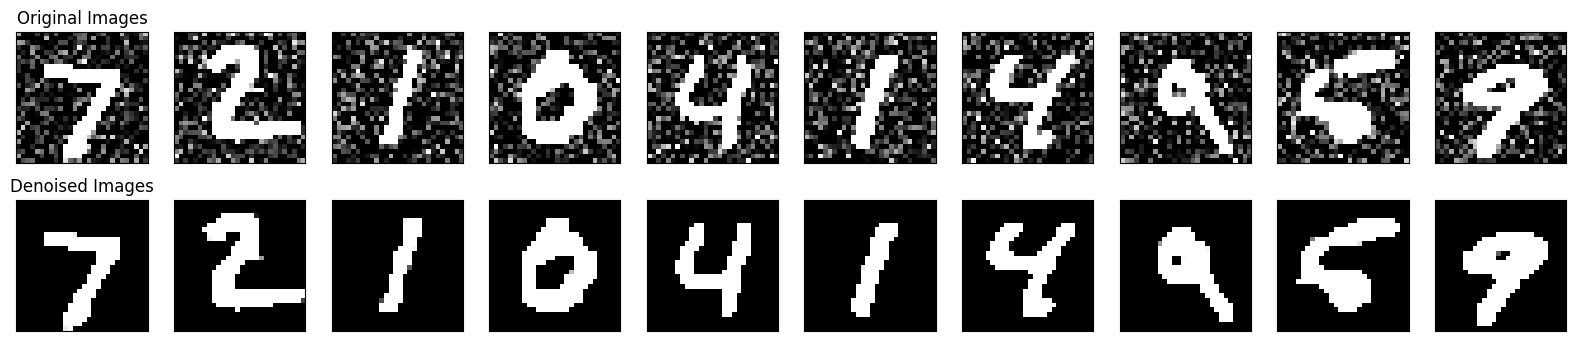

In [15]:
model.fit(noisy_X_train, X_train, batch_size=128, epochs=5)


# Make predictions on the noisy testing set to de-noise it
denoised_X_test = model.predict(noisy_X_test)
plt.figure(figsize=(20, 4))

# Plot 10 random images of the testing set before and after de-noising
n = 10
for i in range(n):
    
    # Plot original image
    ax = plt.subplot(2, n, i + 1)
    imgplot = plt.imshow(noisy_X_test[i,:,:].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original Images")
    
    # Plot denoised image
    ax = plt.subplot(2, n, i + 1 + n)
    imgplot = plt.imshow(denoised_X_test[i,:,:].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Denoised Images")

plt.show()